# ClusterAl 2020


# Ciencia de Datos - Ingenieria Industrial UTN BA
# Curso I5521


## "Establecimientos Hospitalarios en Provincia de Buenos Aires"

#### Docente: Martin Palazzo

#### Mentor: Ezequiel Vannucchi

####  Grupo N°9
#### JULIÁN BOGLIO

Buenos Aires tiene 134 Municipios divididos en 12 Regiones Sanitarias, zonas en que se divide el territorio bonaerense tomando en cuenta su población y las instalaciones médicas y sanitarias disponibles. 

La Región Sanitaria Nº 1 comprende a: Carmen de Patagones, Adolfo Alsina, González Chávez, Bahía Blanca, Coronel Dorrego, Coronel Pringles, Coronel Rosales, Coronel Suárez, Guaminí, Monte Hermoso, Puan, Saavedra, Torquinst, Tres Arroyos y Villarino; aproximadamente funcionan 195 centros de salud.

La Nº 2 está conformada por: Carlos Tejedor, Pehuajó, Daireaux, General Villegas, 9 de Julio, Carlos Casares, Trenque Lauquen, Rivadavia, Pellegrini, Tres Lomas, Saliquelo, e Hipólito Irigoyen; tiene aproximadamente 111 Centros.

A la Región Sanitaria Nº 3 la componen los municipios de:General Viamonte, Chacabuco, Junín, General Arenales, Leandro N. Alem, General Pinto, F. Ameghino y Lincoln; aquí están en funcionamiento 85 Centros de Salud aproximadamente.

Por su parte: Capitán Sarmiento, Carmen de Areco, San Andrés de Giles, San Antonio de Areco, Baradero, San Pedro, Ramallo, San Nicolás, Arrecifes, Salto, Pergamino, Colón, Rojas forman la Región Sanitaria Nº 4, en donde hay 111 centros de Salud.

En la Región Nº 5 hay 356 Centros en funcionamiento distribuidos en las siguientes localidades: Exaltación de la Cruz, Zárate, Campana, Pilar, Escobar, Tigre, José C. Paz, Malvinas Argentinas, San Fernando, San Isidro, Vicente López, Gral. San Martín, San Miguel e Isla Martín García.

La sexta es una de las más extensas porque enmarca a dos municipios del primer cordón del Conurbano Bonaerense de la Zona Sur que limitan con la Capital Federal Avellaneda y Lanús, y a siete del segundo cordón del Conurbano: Almirante Brown, Berazategui, Esteban Echeverría, Ezeiza, Florencio Varela, Lomas de Zamora y Quilmes. En total suma una población estimada de 3.650.198 personas.

La Región 7 incluye a Moreno, Hurlingham, Morón, Ituzaingo, Tres de Febrero, Merlo, General Las Heras, Gral. Rodríguez, Marcos Paz y Luján; cuenta con 160 centros de salud.

La Región Sanitaria Nº 8 comprende los municipios de: General Lavalle, Maipú, Partido de La Costa, Pinamar, Villa Gesell, General Madariaga, General Guido, Ayacucho, Tandil, Balcarce, Mar Chiquita, General Pueyrredón, General Alvarado, Loberia, Necochea, San Cayetano; tiene 190 centros.

La novena incluye a: Las Flores, General Alvear, Tapalqué, Bolívar, Azul, Benito Juárez, Laprida, Olavarría, Lamadrid y Rauch; brinda atención médica a través de sus 111 centros de Salud.

La Región Sanitaria Nº 10 abarca a:Mercedes, Lobos, Suipacha, Bragado, Alberti, Chivilcoy, Navarro, Roque, Pérez, 25 de Mayo y Saladillo; posee 106 centros.

Pilar, Dolores, Tordillo, Castelli, General Belgrano, Chascomús, Punta Indio, Monte, General Paz, Brandsen, Berisso, La Plata, Ensenada, San Vicente, Cañuelas, Presidente Perón y Magdalena, componen a la Región Sanitaria Nº 11 que cuenta con 184 centros.

Por último la Nº 12 comprende al Partido de La Matanza y cuenta con aproximadamente 78 centros de salud.

<img src="REGION-SANITARIA.JPG" style="width: 1000px;"/>

Lo primero que haremos será importar librerías a utilizar durante el proyecto y luego cargar el data set:

In [98]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, datasets, preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV

In [62]:
#Importar dataset
hospitalarios = pd.read_excel('rendimientos-hospitalarios.xlsx')

## Limpieza de datos
A continuación analizaremos los datos con los features:

In [63]:
#Cuántasfilas y columnas tiene
filas = np.shape(hospitalarios)[0] # [0] para la primera dimension
print("El Data Set se compone de", filas, "filas.")
columnas = np.shape(hospitalarios)[1] # [1] para la segunda dimension
print("Además, el Data Set se compone de", columnas, "columnas.")

El Data Set se compone de 29805 filas.
Además, el Data Set se compone de 20 columnas.


In [64]:
# Con qué columnas cuenta el Dataset
hospitalarios.columns.values

array(['anio', 'region_sanitaria', 'municipio_id', 'municipio_nombre',
       'dependencia', 'establecimiento', 'consultas_odontologicas',
       'consultas_medicas', 'consultas_paramedicas', 'interconsultas',
       'egresos', 'dias_camas_disponible', 'promedio_camas_disponibles',
       'pacientes_dias', 'ocupacion_porcentaje', 'giro_de_camas',
       'dias_estadia', 'promedio_dias_estadia', 'defunciones',
       'tasa_mortalidad_hospitalaria'], dtype=object)

In [65]:
#Ahora verificamos que las columnas no tengan NaN.
col_NaN = hospitalarios.isnull().any()
print(col_NaN,'\r\n')

anio                            False
region_sanitaria                 True
municipio_id                     True
municipio_nombre                 True
dependencia                      True
establecimiento                  True
consultas_odontologicas          True
consultas_medicas                True
consultas_paramedicas            True
interconsultas                   True
egresos                          True
dias_camas_disponible            True
promedio_camas_disponibles       True
pacientes_dias                   True
ocupacion_porcentaje             True
giro_de_camas                    True
dias_estadia                     True
promedio_dias_estadia            True
defunciones                      True
tasa_mortalidad_hospitalaria     True
dtype: bool 



En principio se eliminarán los valores nulos.

In [66]:
# Eliminamos los NaN
hospitalarios.dropna()

,anio,region_sanitaria,municipio_id,municipio_nombre,dependencia,establecimiento,consultas_odontologicas,consultas_medicas,consultas_paramedicas,interconsultas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,dias_estadia,promedio_dias_estadia,defunciones,tasa_mortalidad_hospitalaria
0,2009,I,60007.0,Adolfo Alsina,Municipal,Hogar de Ancianos General N. Levalle,0.0,0.0,0.0,0.0,1.0,12775.0,35.0,12291.0,96.0,0.0,3182.0,3182.0,0.0,0.0
1,2009,I,60875.0,Villarino,Municipal,Hospital Subzonal Especializado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,IX,60049.0,Azul,Municipal,Servicio de Psiquiatría del Hospital Dr. Angel...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009,V,60412.0,José C. Paz,Municipal,Hospital Odontológico Eva Perón,217971.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,I,60007.0,Adolfo Alsina,Municipal,Unidad Sanitaria San Miguel Arcangel,4858.0,7999.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29800,2018,XII,60427.0,La Matanza,Municipal,Unidad Sanitaria El Torero,0.0,10528.0,1578.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29801,2018,XII,60427.0,La Matanza,Municipal,Unidad Sanitaria Villegas,0.0,7482.0,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29802,2018,XII,60427.0,La Matanza,Municipal,Sala Dr. Miqueleiz (Independencia),0.0,15746.0,1069.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29803,2018,XII,60427.0,La Matanza,Municipal,Emergencias Sanitarias,0.0,23042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cantidad de establecimientos relevados por año

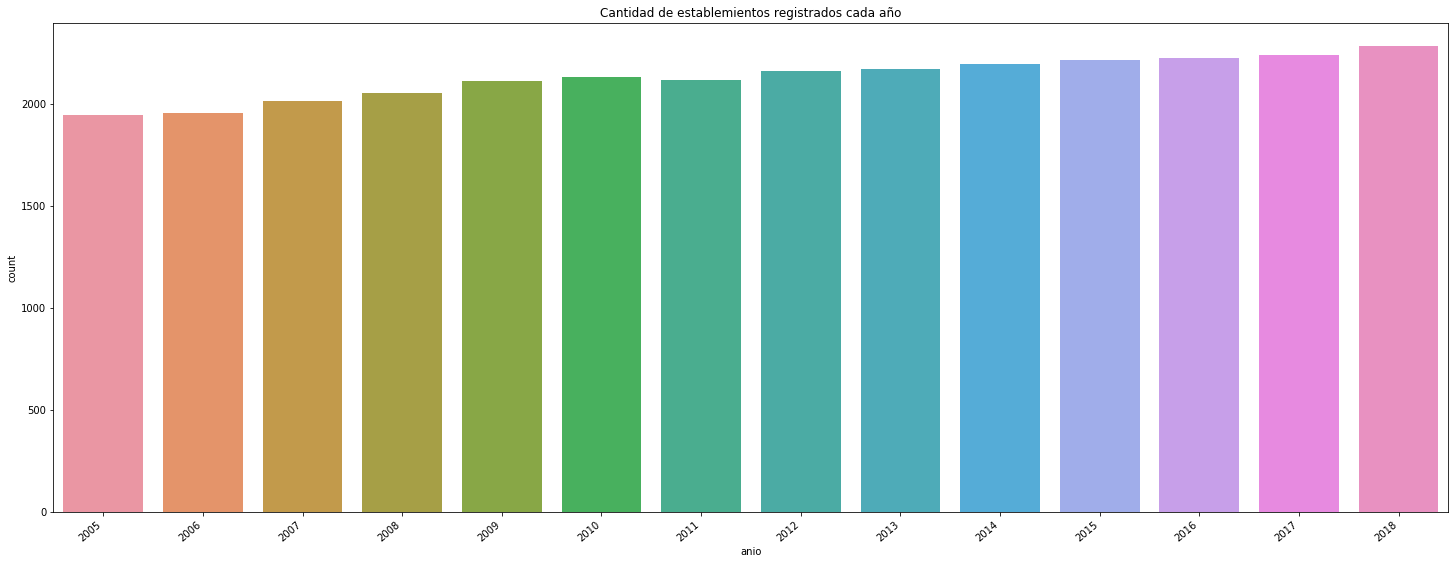

In [67]:
plt.figure (figsize=(25,9))
ax = sns.countplot(x="anio", data=hospitalarios)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de establemientos registrados cada año")
plt.show()

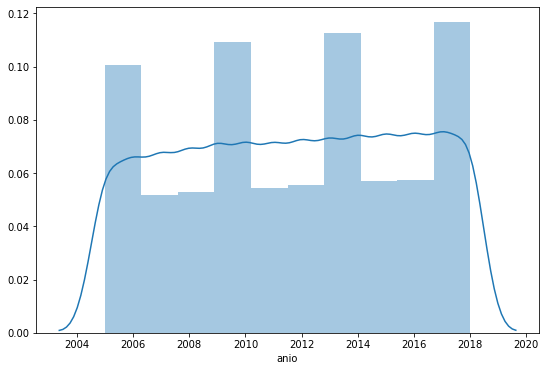

In [68]:
plt.figure(figsize=(9,6))
sns.distplot(hospitalarios['anio'], bins=10)
plt.show()

## Cantidad de establecimientos por región

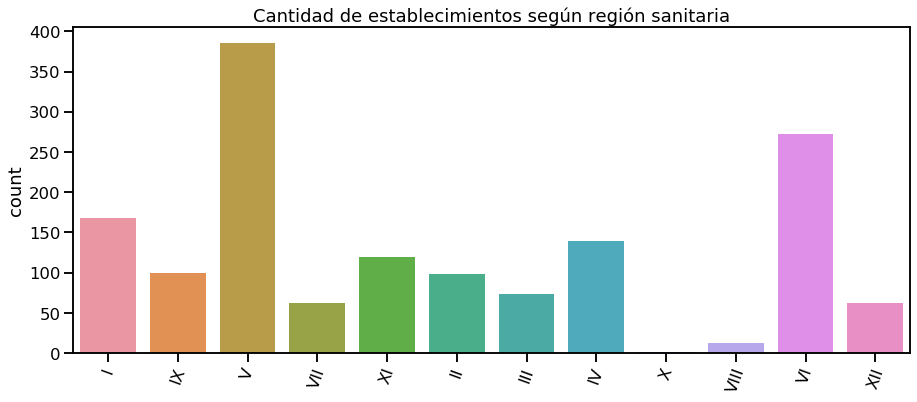

In [69]:
sns.set_context("talk", font_scale=1)
plt.figure(figsize=(15,6))
sns.countplot(hospitalarios.region_sanitaria.values)
plt.title("Cantidad de establecimientos según región sanitaria")
plt.xticks(rotation=70)
plt.show()

In [70]:
hospitalarios[hospitalarios['region_sanitaria'] == "X"]

,anio,region_sanitaria,municipio_id,municipio_nombre,dependencia,establecimiento,consultas_odontologicas,consultas_medicas,consultas_paramedicas,interconsultas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,dias_estadia,promedio_dias_estadia,defunciones,tasa_mortalidad_hospitalaria
623,2014,X,60532.0,Mercedes,Provincial,Hospital Zonal General de Agudos Blas Dubarry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En el dataset no hay datos sobre la región sanitaria X, que incluye los partidos de:
- Lobos
- Mercedes
- Suipacha
- Navarro
- 25 de Mayo
- Saladillo
- Roque Pérez
- Saladillo
- Bragado
- Chivilcoy
<img src="region X (1).JPG" style="width: 750px;"/>

## Análisis de la mortalidad

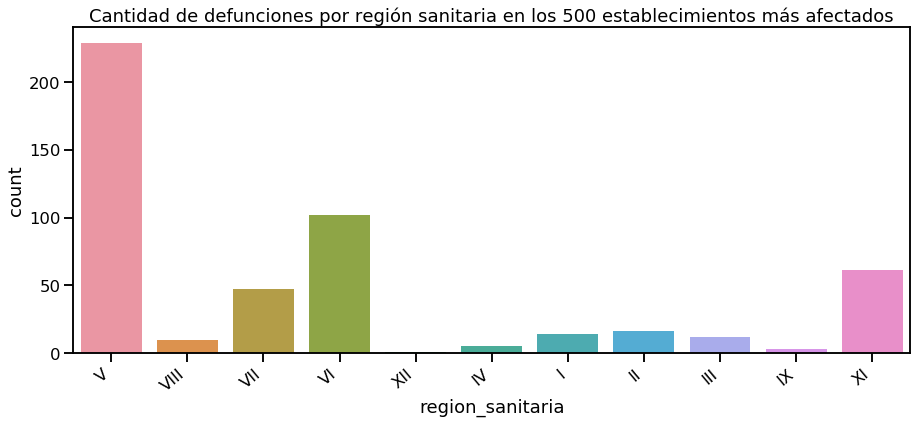

In [71]:
## Ordenado por defunciones segun criterio usando sort_values
ordenado_defunciones = hospitalarios.sort_values(["defunciones"], ascending=[False]).head(500)
ordenado_defunciones["region_sanitaria"].value_counts()

plt.figure (figsize=(15,6))
ax = sns.countplot(x="region_sanitaria", data=ordenado_defunciones)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de defunciones por región sanitaria en los 500 establecimientos más afectados")
plt.show()

In [72]:
ordenado_defunciones[ordenado_defunciones['region_sanitaria'] == "XII"]

,anio,region_sanitaria,municipio_id,municipio_nombre,dependencia,establecimiento,consultas_odontologicas,consultas_medicas,consultas_paramedicas,interconsultas,egresos,dias_camas_disponible,promedio_camas_disponibles,pacientes_dias,ocupacion_porcentaje,giro_de_camas,dias_estadia,promedio_dias_estadia,defunciones,tasa_mortalidad_hospitalaria
29744,2018,XII,60427.0,La Matanza,Municipal,Policlínico Central,0.0,206567.0,4363.0,0.0,3449.0,17019.0,47.0,9708.0,57.0,74.0,9454.0,3.0,30.0,1.0


El único Establecimiento de la región XII entre los más 500 afectados por las defunciones es el Policlínico Central de La Matanza.
<img src="region12.png" style="width: 750px;"/>

In [51]:
#A qué municipio corresponden los establecimientos más afectados por muertes
ordenado_defunciones["municipio_nombre"].value_counts().head(15)

La Plata               51
Malvinas Argentinas    50
Avellaneda             39
Moreno                 38
Zárate                 31
Pilar                  31
Vicente López          26
Tigre                  25
Almirante Brown        24
San Fernando           22
San Isidro             20
Lomas de Zamora        19
Berazategui            18
San Miguel             16
General Pueyrredón      9
Name: municipio_nombre, dtype: int64

Se justifica que haya tantos establecimientos en las regiones V y VI debido a la gran cantidad de muertes. 

Cruzamos con cantidad de consultas, internaciones, o algo asi para ver si e justifica que en las zonas 5 y 6 haya tantos establecimientos o si en la 12 están por debajo de lo necesario

In [52]:
## Establecimientos con mayor mortalidad hospitalaria
hospitalarios_mayor_mortalidad = hospitalarios[(hospitalarios["tasa_mortalidad_hospitalaria"] < 100) & (hospitalarios["tasa_mortalidad_hospitalaria"] > 50)]
hospitalarios_mayor_mortalidad[['establecimiento', 'region_sanitaria', 'defunciones', 'egresos']]

,establecimiento,region_sanitaria,defunciones,egresos
65,Hogar Municipal del Anciano,I,6.0,8.0
228,Hogar de Ancianos Dr. J. R. Lamas,II,4.0,5.0
245,Hogar de Ancianos Municipal Sto. D. de Guzmán,II,12.0,19.0
374,Hogar de Ancianos de Vedia,III,12.0,13.0
435,Hogar de Ancianos Carlos Stebb,IV,23.0,24.0
490,Hogar Geriátrico Nuestra Sra. de Luján,IV,12.0,15.0
723,Hogar de Ancianos Sarah Forrest de Cuelli,V,10.0,11.0
1204,Hogar de Ancianos Dr. Salvador Sallares,VI,10.0,13.0


In [53]:
# Cuántas veces desde 2005 cada región tuvo más de 80% de mortalidad
hospitalarios_mayor_mortalidad['region_sanitaria'].value_counts()

IV     2
II     2
V      1
III    1
I      1
VI     1
Name: region_sanitaria, dtype: int64

In [54]:
hospitalarios_mayor_mortalidad['dias_estadia'].max()

43645.0

In [55]:
hospitalarios_mayor_mortalidad[["establecimiento", "region_sanitaria", "municipio_nombre", "ocupacion_porcentaje", "tasa_mortalidad_hospitalaria"]].sort_values("ocupacion_porcentaje", ascending = False)

,establecimiento,region_sanitaria,municipio_nombre,ocupacion_porcentaje,tasa_mortalidad_hospitalaria
228,Hogar de Ancianos Dr. J. R. Lamas,II,General Villegas,100.0,80.0
490,Hogar Geriátrico Nuestra Sra. de Luján,IV,San Andrés de Giles,98.0,80.0
1204,Hogar de Ancianos Dr. Salvador Sallares,VI,Florencio Varela,89.0,77.0
245,Hogar de Ancianos Municipal Sto. D. de Guzmán,II,2020-07-09 00:00:00,84.0,63.0
65,Hogar Municipal del Anciano,I,Coronel de Marina Leonardo Rosales,83.0,75.0
374,Hogar de Ancianos de Vedia,III,Leandro N. Alem,83.0,92.0
435,Hogar de Ancianos Carlos Stebb,IV,Colón,81.0,96.0
723,Hogar de Ancianos Sarah Forrest de Cuelli,V,General San MartÍn,73.0,91.0


In [56]:
hospitalarios_mayor_mortalidad[["establecimiento", "region_sanitaria", "municipio_nombre", "promedio_camas_disponibles", "ocupacion_porcentaje", "tasa_mortalidad_hospitalaria"]].sort_values("ocupacion_porcentaje", ascending = False)

,establecimiento,region_sanitaria,municipio_nombre,promedio_camas_disponibles,ocupacion_porcentaje,tasa_mortalidad_hospitalaria
228,Hogar de Ancianos Dr. J. R. Lamas,II,General Villegas,32.0,100.0,80.0
490,Hogar Geriátrico Nuestra Sra. de Luján,IV,San Andrés de Giles,72.0,98.0,80.0
1204,Hogar de Ancianos Dr. Salvador Sallares,VI,Florencio Varela,48.0,89.0,77.0
245,Hogar de Ancianos Municipal Sto. D. de Guzmán,II,2020-07-09 00:00:00,67.0,84.0,63.0
65,Hogar Municipal del Anciano,I,Coronel de Marina Leonardo Rosales,49.0,83.0,75.0
374,Hogar de Ancianos de Vedia,III,Leandro N. Alem,50.0,83.0,92.0
435,Hogar de Ancianos Carlos Stebb,IV,Colón,91.0,81.0,96.0
723,Hogar de Ancianos Sarah Forrest de Cuelli,V,General San MartÍn,71.0,73.0,91.0


## Análisis de los tipos de establecimientos

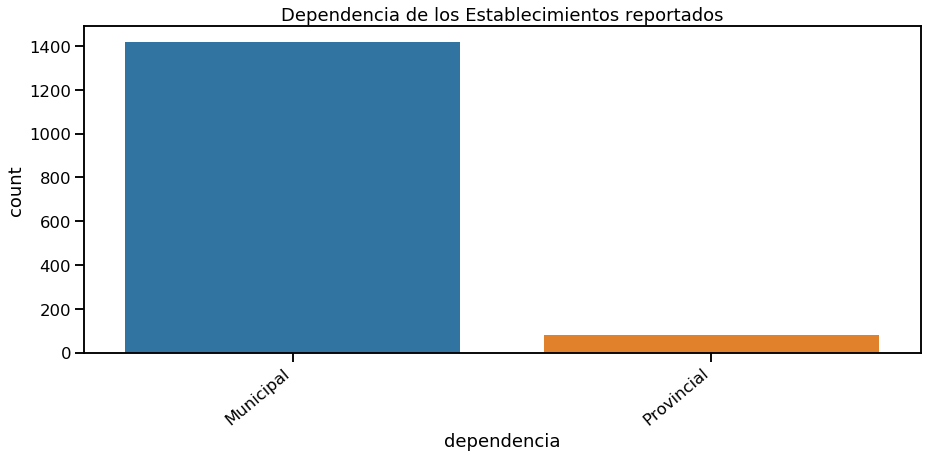

In [83]:
plt.figure (figsize=(15,6))
ax = sns.countplot(x="dependencia", data=hospitalarios)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Dependencia de los Establecimientos reportados")
plt.show()

In [17]:
q_establecimientos = len(hospitalarios['establecimiento'].unique()) # Cantidad de valores unicos en 'Establecimiento'
print(f'En total hay {q_establecimientos} establecimientos registrados')

En total hay 1305 establecimientos registrados


Ante la cantidad de valores diversos que contiene la columna "establecimiento", los categorizamos analizamos el comportamiento de cada uno.

Extraemos del dataframe 5 tipos de establecimiento, los más significativos: 
* Hospitales   
* Hogares
* CAPS (Centros de Atención Primaria de la Salud)
* Salas
* Unidades Sanitarias

In [60]:
Hospital = hospitalarios[hospitalarios['establecimiento'].str.contains ('Hospital', case=False, na=False)]
Hogar = hospitalarios[hospitalarios['establecimiento'].str.contains ('Hogar', case=False, na=False)]
Unidad_sanitaria = hospitalarios[hospitalarios['establecimiento'].str.contains ('Unidad Sanitaria', case=False, na=False)]
CAPS = hospitalarios[hospitalarios['establecimiento'].str.contains ('CAPS', case=False, na=False)]
Sala = hospitalarios[hospitalarios['establecimiento'].str.contains ('Sala', case=False, na=False)]

Consultas_salas = Sala['consultas_medicas'].sum()
Consultas_hospitales = Hospital['consultas_medicas'].sum()
Consultas_CAPS = CAPS['consultas_medicas'].sum()
Consultas_unidad_sanitaria = Unidad_sanitaria['consultas_medicas'].sum()
Consultas_hogares = Hogar['consultas_medicas'].sum()

Camas_hogares = Hogar['promedio_camas_disponibles'].sum()
Camas_hospitales = Hospital['promedio_camas_disponibles'].sum()
Camas_CAPS = CAPS['promedio_camas_disponibles'].sum()
Camas_salas = Sala['promedio_camas_disponibles'].sum()
Camas_unidades_sanitarias = Unidad_sanitaria['promedio_camas_disponibles'].sum()

### Cantidad de consultas médicas por cada tipo de establecimiento

In [61]:
reporte_consultas = pd.DataFrame(data = [["Sala", Consultas_salas], ["Hospital", Consultas_hospitales], ["CAPS", Consultas_CAPS], ["Hogar", Consultas_hogares], ["Unidad Sanitaria", Consultas_unidad_sanitaria]],
columns = ['Tipo de establecimiento', 'Consultas médicas'])
reporte_consultas

,Tipo de establecimiento,Consultas médicas
0,Sala,619484.0
1,Hospital,8417891.0
2,CAPS,1543419.0
3,Hogar,24829.0
4,Unidad Sanitaria,6032516.0


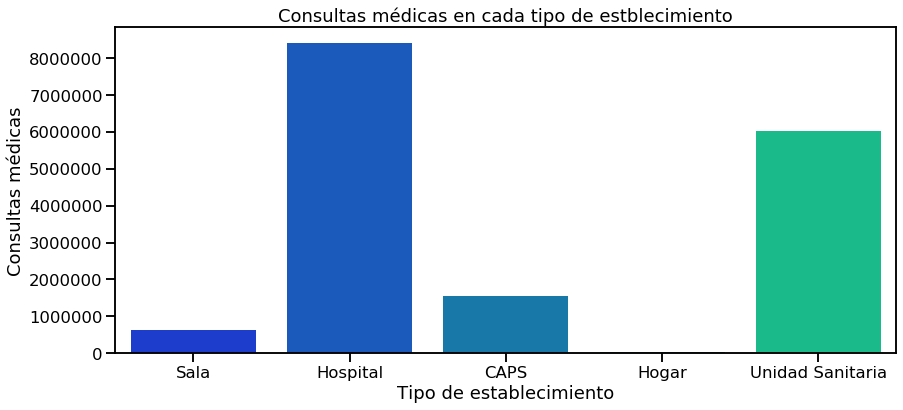

In [62]:
fig = plt.figure(figsize = (14,6))
sns.barplot(x = 'Tipo de establecimiento', y = 'Consultas médicas', data = reporte_consultas, palette="winter")
plt.title("Consultas médicas en cada tipo de estblecimiento")
plt.xticks(rotation=0)
plt.show()

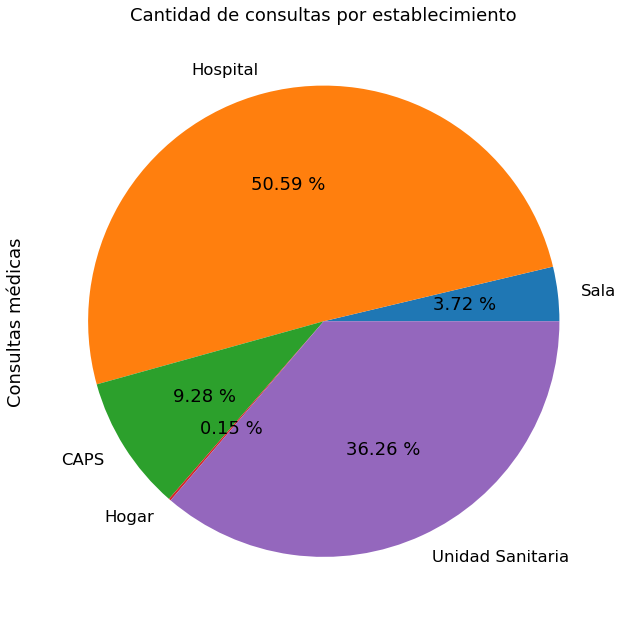

In [63]:
reporte_consultas.plot(kind='pie', figsize=(15,9), labels = reporte_consultas['Tipo de establecimiento'], y='Consultas médicas', legend=None, autopct='%.2f %%', title='Cantidad de consultas por establecimiento') 
plt.tight_layout() 
plt.show()

### Cantidad de camas disponibles por cada tipo de establecimiento

In [64]:
reporte_camas =pd.DataFrame(data = [["Sala", Camas_salas], ["Hospital", Camas_hospitales], ["CAPS", Camas_CAPS], ["Hogar", Camas_hogares], ["Unidad Sanitaria", Camas_unidades_sanitarias]],
columns = ['Tipo de establecimiento', 'Camas disponibles'])
reporte_camas

,Tipo de establecimiento,Camas disponibles
0,Sala,36.0
1,Hospital,7687.0
2,CAPS,0.0
3,Hogar,1625.0
4,Unidad Sanitaria,397.0


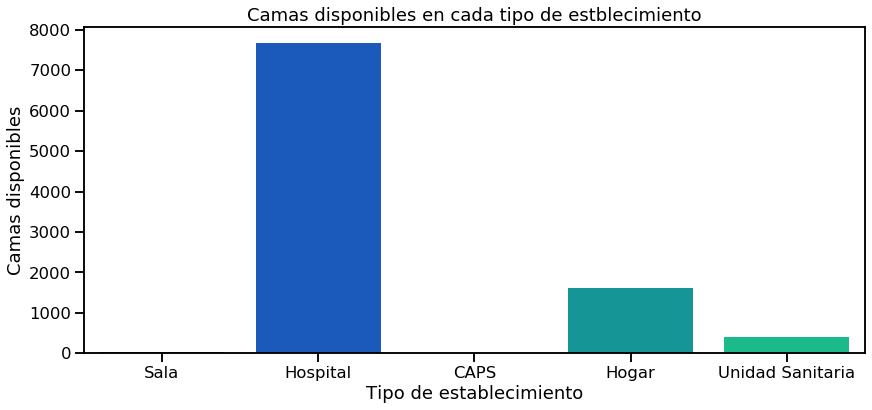

In [65]:
fig = plt.figure(figsize = (14,6))
sns.barplot(x = 'Tipo de establecimiento', y = 'Camas disponibles', data = reporte_camas, palette="winter")
plt.title("Camas disponibles en cada tipo de estblecimiento")
plt.xticks(rotation=0)
plt.show()

## Indicadores anuales

Finalizado este análisis buscaremos contar cada uno de los indicadores de Gestión Hospitalaria de manera anual:

In [18]:
consultas = hospitalarios[["anio", "consultas_medicas", "consultas_odontologicas", "consultas_paramedicas", "interconsultas", "egresos"]]
consultas_anuales = consultas.groupby("anio").sum()
consultas_anuales

,consultas_medicas,consultas_odontologicas,consultas_paramedicas,interconsultas,egresos
anio,,,,,
2005,950259.0,634328.0,109700.0,7644.0,43739.0
2006,325959.0,662008.0,53341.0,7411.0,19422.0
2007,195146.0,743922.0,56215.0,6740.0,12077.0
2008,20850.0,834584.0,10462.0,0.0,2.0
2009,12350458.0,1814009.0,1578851.0,0.0,29510.0
2010,426385.0,923940.0,16417.0,3185.0,17847.0
2011,526320.0,1293299.0,34797.0,3717.0,17310.0
2012,715084.0,1484637.0,53999.0,3380.0,31051.0
2013,711822.0,1482476.0,32900.0,2705.0,55600.0


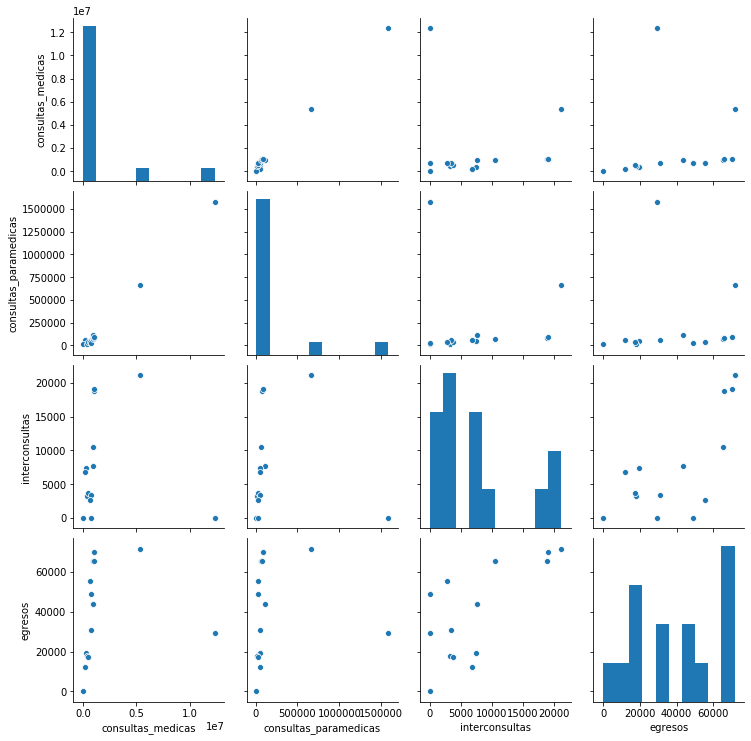

In [19]:
sns.pairplot(consultas_anuales[["consultas_medicas","consultas_paramedicas", "interconsultas", "egresos"]])
plt.show()

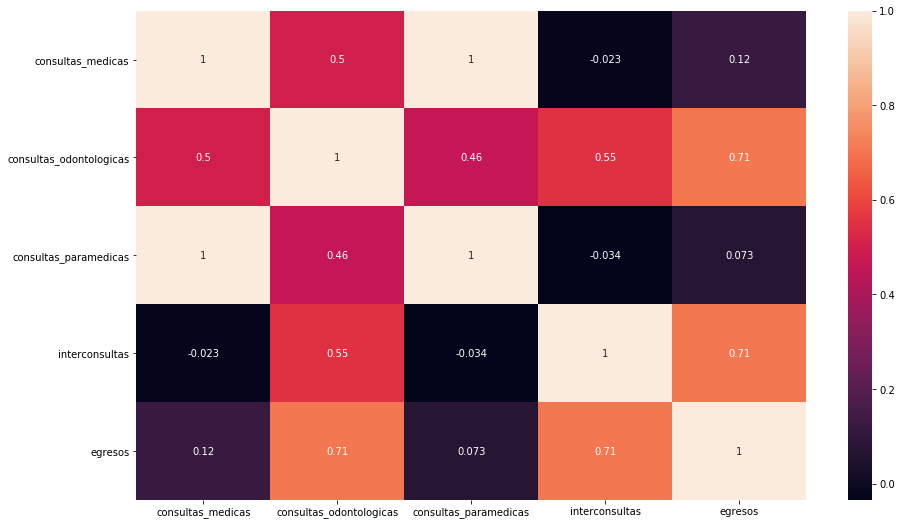

In [20]:
matriz_corr = consultas_anuales.corr()
plt.figure(figsize=(15,9))
sns.heatmap(data = matriz_corr, annot = True)
plt.show()

Existe una correlación lineal perfecta entre consultas médicas y paramédicas:
* Las consultas médicas son realizadas por médicos especialistas, mientras que las últimas son realizadas por un médico general o por personal técnico.

Existe una correlación entre las interconsultas y los egresos:
* Recordamos que una interconsulta ocurre cuando el profesional de la salud que lo atiende considera necesario que usted sea evaluado por un médico especialista cuando la hacen en el consultorio o por otro especialista cuando usted es visto por un médico del hospital. Un egreso es el alta del paciente por transferencia a otra institución de salud, inconformidad por la atención prestada, inadaptación al medio hospitalario o por motivos económicos.

In [21]:
data = hospitalarios[["anio", "region_sanitaria", "defunciones"]]
data_anual = data.groupby(["anio", "region_sanitaria"]).sum()
data_anual.sort_values(by="defunciones", ascending=[False]).head(15)

,,defunciones
anio,region_sanitaria,
2015,V,1530.0
2013,V,1502.0
2014,V,1477.0
2016,V,1452.0
2012,V,1439.0
2017,V,1412.0
2018,V,1311.0
2005,V,1289.0
2011,V,1127.0


Se puede verificar que la región sanitaria V y la VIII son las más afectadas por defunciones en establecimientos hospitalarios.

Sería importante conocer por qué se notifican más datos de esta zona.

<img src="region5.png" style="width: 750px;"/>
<img src="region8.JPG" style="width: 750px;"/>

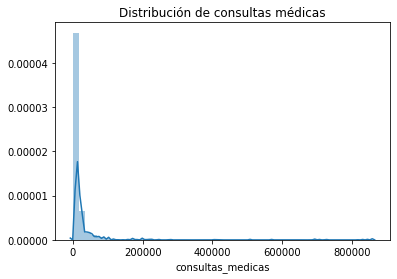

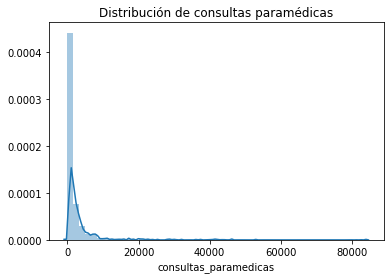

In [22]:
sns.distplot(hospitalarios["consultas_medicas"])
plt.title('Distribución de consultas médicas')
plt.show()

sns.distplot(hospitalarios["consultas_paramedicas"])
plt.title('Distribución de consultas paramédicas')
plt.show()